# Name :- Prekshita vasudeo patil
# registration No:- 20MAI0073
#### Github link :- https://github.com/prekshita19/DL-Assignments
#### Dataset Link :- https://drive.google.com/drive/folders/1PTldyrKSsLp1CRJMb_GHhJrO6MjZUbPX?usp=sharing

In [3]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
xtrain,xtest,ytrain,ytest=[],[],[],[]
for i in os.listdir('Images'):
    for j in os.listdir("Images/"+i):
        for k in os.listdir("Images/"+i+"/"+j):
            image = cv2.imread("Images/"+i+"/"+j+"/"+k)
            image = cv2.resize(image/255,(100,100))
#             image = cv2.resize(image/255,(1080,1900))
            if i=='train':
                xtrain.append(image)
                ytrain.append(j)
            elif i=='test':
                xtest.append(image)
                ytest.append(j)
            else:
                print("Something went wrong")

<Figure size 432x288 with 0 Axes>

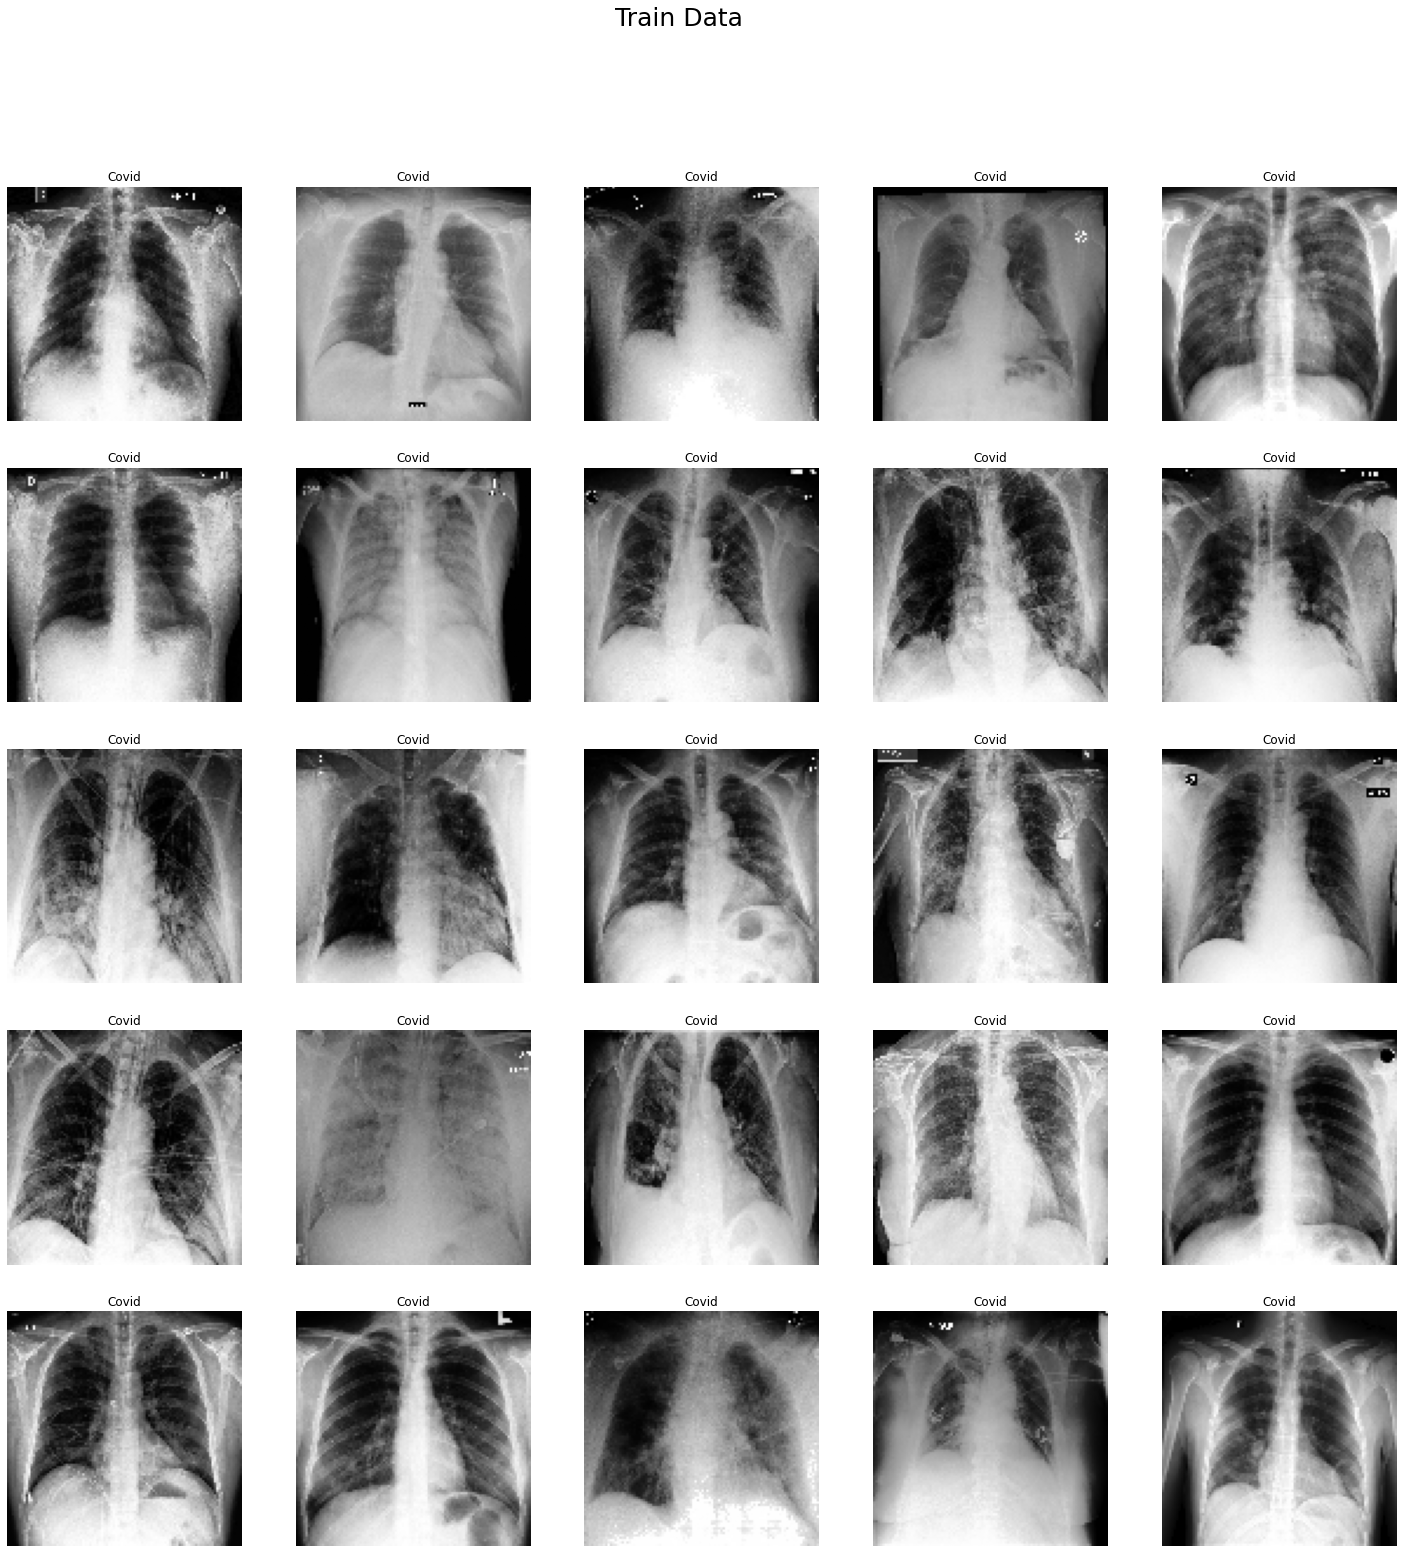

In [5]:
fig = plt.figure()
_, axs = plt.subplots(5, 5, figsize=(25,25))
axs = axs.flatten()
for img, ax,k in zip(xtrain, axs,ytrain):
    ax.axis("off")
    ax.set_title(k)
    ax.imshow(img)
plt.suptitle('Train Data',fontsize=25)
plt.savefig("Training Image.jpg")
plt.show()

<Figure size 432x288 with 0 Axes>

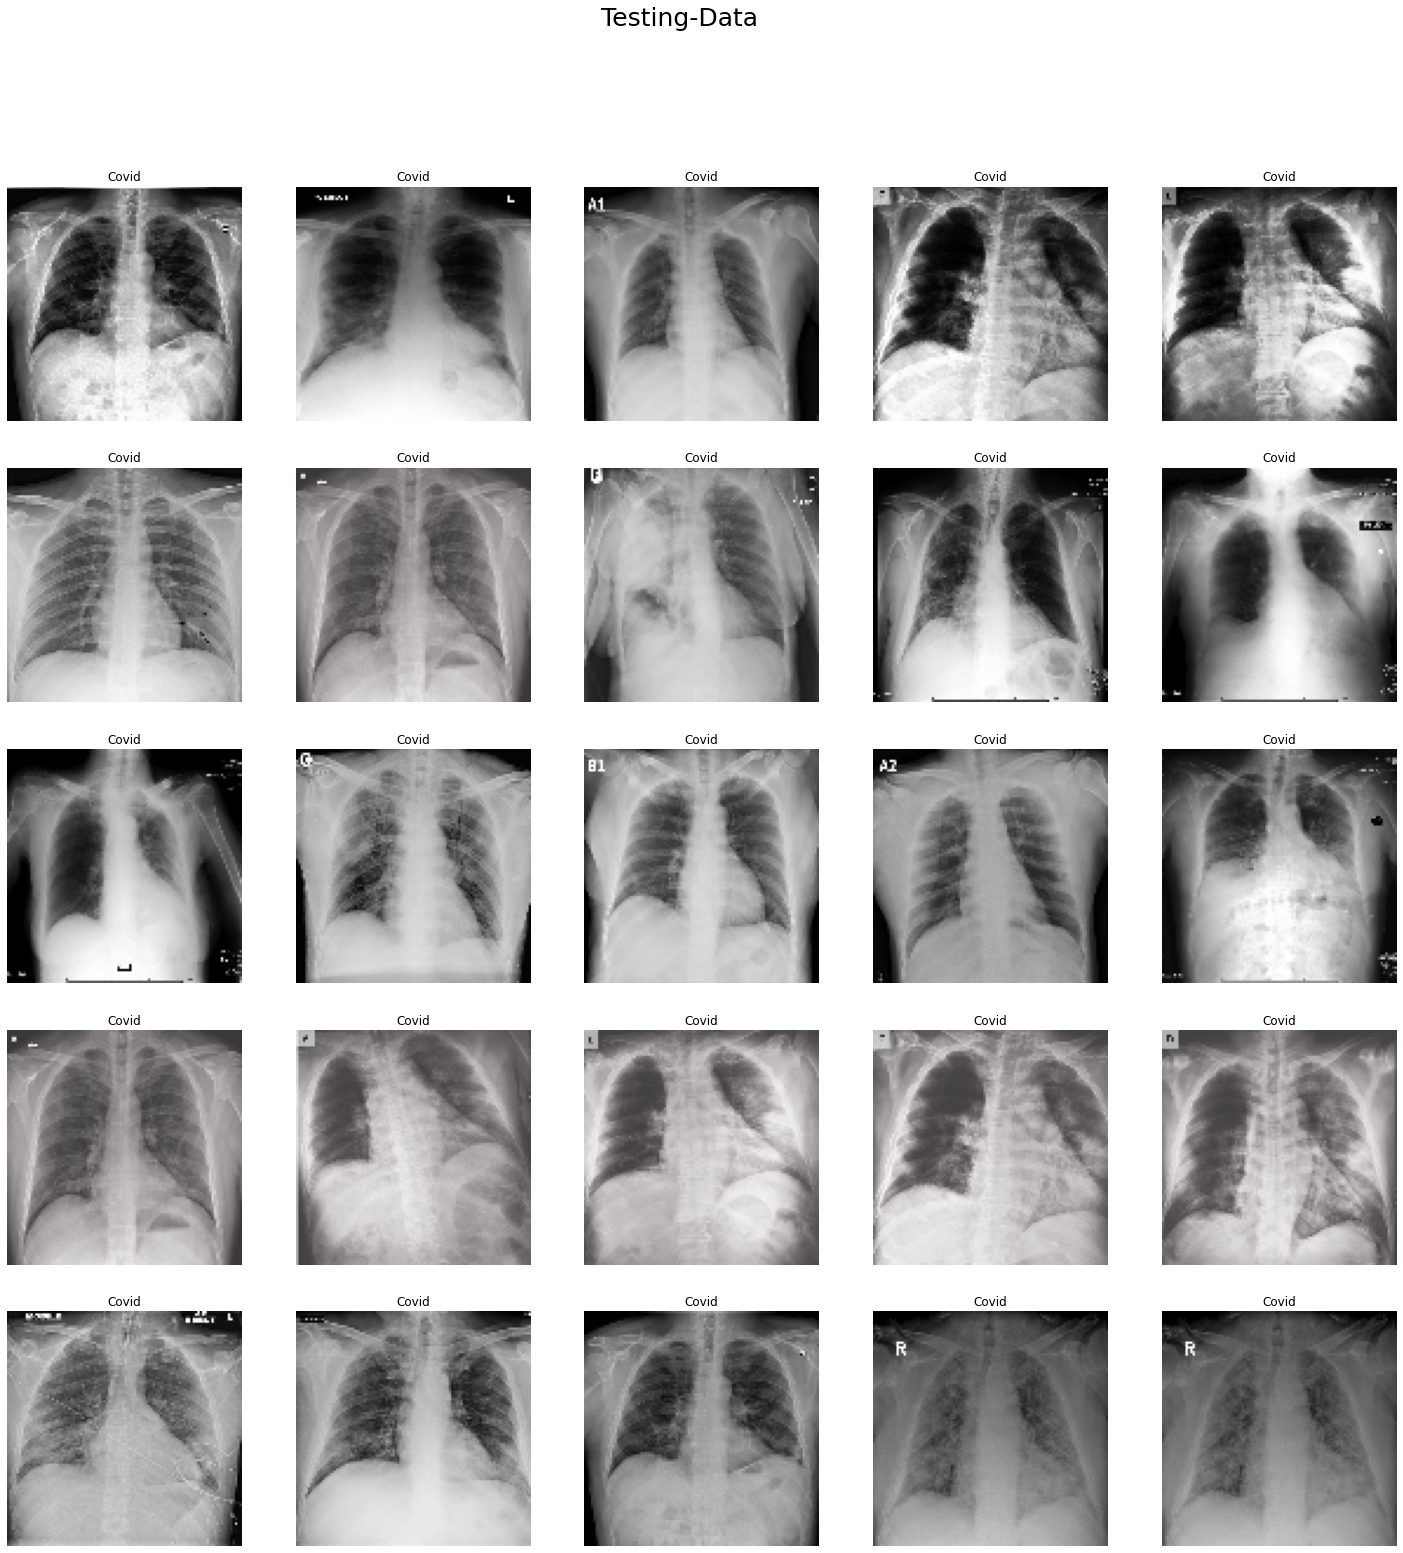

In [6]:
fig = plt.figure()
_, axs = plt.subplots(5, 5, figsize=(25,25))
axs = axs.flatten()
for img, ax,k in zip(xtest, axs,ytest):
    ax.axis("off")
    ax.set_title(k)
    ax.imshow(img)
plt.suptitle('Testing-Data',fontsize=25)
plt.savefig("Testing Image.jpg")
plt.show()

In [7]:
import numpy as np
xtrain = np.array(xtrain).astype(np.float32)
xtest = np.array(xtest).astype(np.float32)

In [8]:
xtrain[-1].shape

(100, 100, 3)

(100, 100, 3)


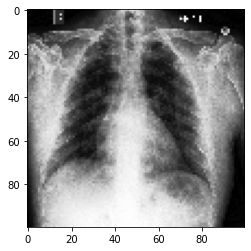

In [9]:
plt.imshow(xtrain[0])
print(xtrain[0].shape)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.fit_transform(ytest)

In [11]:
ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [12]:
xtrain_reshaped = xtrain.reshape((len(xtrain),-1))
xtest_reshaped = xtest.reshape((len(xtest),-1))

In [13]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(xtrain_reshaped,ytrain)
predict = model.predict(xtest_reshaped)

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(predict,ytest)*100)

78.78787878787878


In [15]:
print(classification_report(predict,ytest))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.50      0.91      0.65        11
           2       0.85      0.65      0.74        26

    accuracy                           0.79        66
   macro avg       0.77      0.81      0.76        66
weighted avg       0.84      0.79      0.80        66



In [16]:
confusion_matrix(predict,ytest)

array([[25,  1,  3],
       [ 1, 10,  0],
       [ 0,  9, 17]], dtype=int64)